```
Topic:        Project 1
Subject:      Explore MTA turnstile data
Date:         07/06/2020
Names:        David Weon, Adam Rauckhorst, Dyllan Usher

Notebook has been cleaned using nbextension 'Code prettify'
```

# Utilizing US Census Data for NY

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [9]:
sns.set(style='white', palette='colorblind')

In [10]:
demos = pd.read_csv('data/quickfacts.csv', index_col="Fact")
demos.head(50)

,Fact Note,"Kings County (Brooklyn Borough), New York","Value Note for Kings County (Brooklyn Borough), New York","Queens County (Queens Borough), New York","Value Note for Queens County (Queens Borough), New York","Richmond County (Staten Island Borough), New York","Value Note for Richmond County (Staten Island Borough), New York","New York County (Manhattan Borough), New York","Value Note for New York County (Manhattan Borough), New York","Bronx County (Bronx Borough), New York","Value Note for Bronx County (Bronx Borough), New York","New York city, New York","Value Note for New York city, New York"
Fact,,,,,,,,,,,,,
"Population estimates, July 1, 2019, (V2019)",NaN,"2,559,903",NaN,"2,253,858",NaN,"476,143",NaN,"1,628,706",NaN,"1,418,207",NaN,"8,336,817",NaN
"Population estimates base, April 1, 2010, (V2019)",NaN,"2,504,721",NaN,"2,230,619",NaN,"468,730",NaN,"1,586,381",NaN,"1,384,580",NaN,"8,175,031",NaN
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2019, (V2019)",NaN,2.2%,NaN,1.0%,NaN,1.6%,NaN,2.7%,NaN,2.4%,NaN,2.0%,NaN
"Population, Census, April 1, 2010",NaN,"2,504,700",NaN,"2,230,722",NaN,"468,730",NaN,"1,585,873",NaN,"1,385,108",NaN,"8,175,133",NaN
"Persons under 5 years, percent",NaN,7.1%,NaN,6.1%,NaN,5.7%,NaN,4.7%,NaN,7.1%,NaN,6.5%,NaN
"Persons under 18 years, percent",NaN,22.7%,NaN,20.0%,NaN,21.8%,NaN,14.3%,NaN,24.6%,NaN,20.9%,NaN
"Persons 65 years and over, percent",NaN,14.4%,NaN,16.3%,NaN,16.7%,NaN,17.0%,NaN,13.3%,NaN,14.1%,NaN
"Female persons, percent",NaN,52.6%,NaN,51.5%,NaN,51.4%,NaN,52.6%,NaN,52.8%,NaN,52.3%,NaN
"White alone, percent",NaN,49.8%,NaN,47.8%,NaN,74.5%,NaN,64.6%,NaN,44.7%,NaN,42.7%,NaN


In [4]:
#get rid of ugly columns
demos = demos.drop(columns=[column for column in demos.columns[::2]])

In [5]:
#renamed columns
demos.columns = ['Brooklyn', 'Queens', 'Staten Island', 'Manhattan', 'Bronx', 'NYC_Total']
demos.columns

Index(['Brooklyn', 'Queens', 'Staten Island', 'Manhattan', 'Bronx',
       'NYC_Total'],
      dtype='object')

In [6]:
demos.drop('NYC_Total', axis=1, inplace=True)

## Median Income

In [7]:
#median income
income = demos.loc['Median household income (in 2018 dollars), 2014-2018']
income = income.str.replace('$', '')
income = income.str.replace(',', '')
income = income.astype(int)
income = income.reset_index()
income.columns = ['Bor', 'Median_Income']
income

,Bor,Median_Income
0,Brooklyn,56015
1,Queens,64987
2,Staten Island,79267
3,Manhattan,82459
4,Bronx,38085


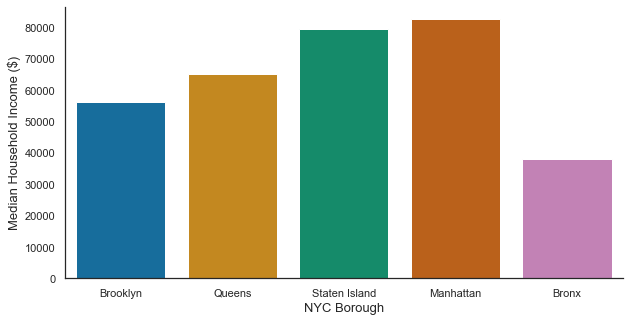

In [8]:
#plotting median income by NYC borough
plt.figure(figsize=(10, 5))
sns.barplot(x='Bor', y='Median_Income', data=income)
#plt.title("Median Income By NY Borough", size=20, weight='bold')
plt.ylabel('Median Household Income ($)', size=13)
plt.xlabel('NYC Borough', size=13)
sns.despine()
plt.savefig('Median_Income.png', dpi=600)

## Number of Women-Owned Firms

In [9]:
#women owned firms
wof = demos.loc['Women-owned firms, 2012']
wof = wof.str.replace(',', '')
wof = wof.astype(int)
wof = wof.reset_index()
wof.columns = ['Bor', 'Women_Owned_Firms']

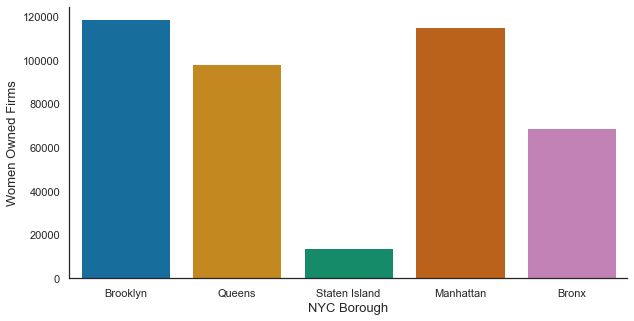

In [10]:
#plotting by number of women owned firms by NY borough
plt.figure(figsize=(10, 5))
sns.barplot(x='Bor', y='Women_Owned_Firms', data=wof)
plt.xlabel('NYC Borough', size=13)
plt.ylabel('Women Owned Firms', size=13)
#plt.title("Women Owned Firms By NY Borough", size=20, weight='bold')
sns.despine()
plt.savefig('Women_Owned_Firms.png', dpi=600)

In [11]:
#put values on top of bars

## Percentage of Women by Borough

In [12]:
#%women, a sanity check
pct_w = demos.loc["Female persons, percent"]
pct_w = pct_w.str.replace('%', '')
pct_w = pct_w.astype(float)
pct_w = pct_w.reset_index()
pct_w.columns = ['Bor', 'Percentage_Women']

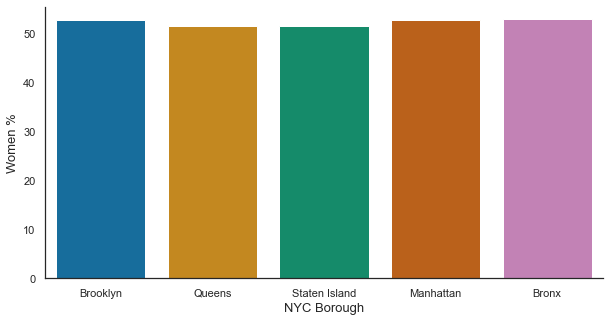

In [13]:
#plotting percentage of women by borough
plt.figure(figsize=(10, 5))
sns.barplot(x='Bor', y='Percentage_Women', data=pct_w)
plt.xlabel('NYC Borough', size=13)
plt.ylabel('Women %', size=13)
#plt.title("Percentage of Women By Borough", size=20, weight='bold')
sns.despine()
plt.savefig('Percentageofwomen.png', dpi=600)